In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [29]:
# Importing the dataset
train_data = pd.read_csv("train_file.csv")
train_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [5]:
train_data.shape

(85895, 32)

In [3]:
# Importing the dataset
test_data = pd.read_csv("test_file.csv")
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [6]:
test_data.shape

(57239, 31)

In [7]:
# Check for any other unusable (NaN) values
print(pd.isnull(train_data).sum())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [8]:
# Check for any other unusable (NaN) values
print(pd.isnull(test_data).sum())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [9]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [16]:
my_submission['ID'].count()

57239

In [17]:
my_submission.shape

(57239, 1)

In [18]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [22]:
# Studying the target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

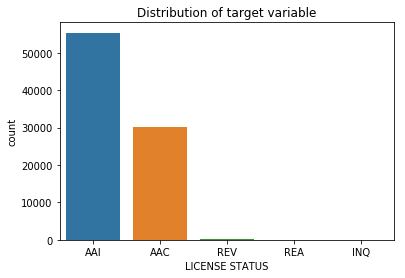

In [26]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()